In [45]:
# 8.0 Handling Images
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 

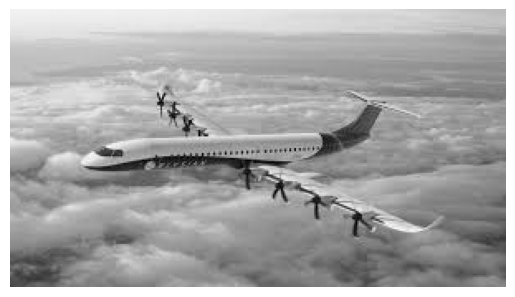

In [3]:
image = cv2.imread('assets/plane.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
image

array([[242, 242, 242, ..., 187, 187, 187],
       [241, 241, 241, ..., 188, 188, 188],
       [241, 241, 241, ..., 189, 189, 189],
       ...,
       [ 77,  77,  77, ..., 129, 130, 130],
       [ 73,  74,  76, ..., 133, 133, 133],
       [ 68,  71,  76, ..., 138, 138, 137]], shape=(168, 300), dtype=uint8)

In [5]:
image.shape

(168, 300)

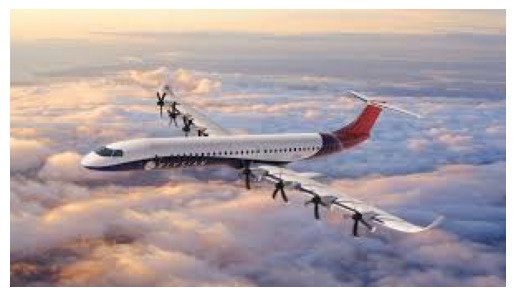

In [6]:
image_bgr = cv2.imread("assets/plane.jpeg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


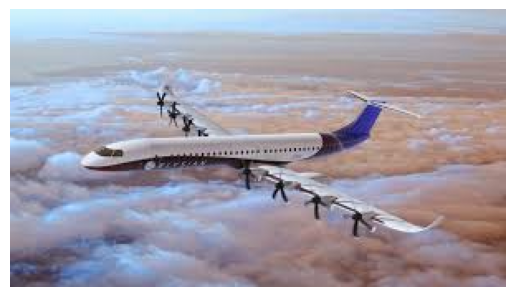

In [7]:
plt.imshow(image_bgr)
plt.axis("off")
plt.show()

In [8]:
# 8.2 saving iamges 
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
cv2.imwrite("assets/plane_gray.jpeg", image_gray)



True

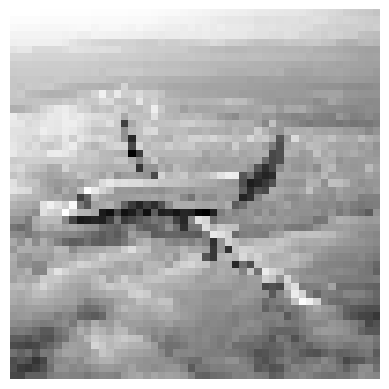

In [9]:
# 8.3 resizing images 
image = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)
image_50x50 = cv2.resize(image, (50, 50))
plt.imshow(image_50x50, cmap="gray")
plt.axis("off")
plt.show()


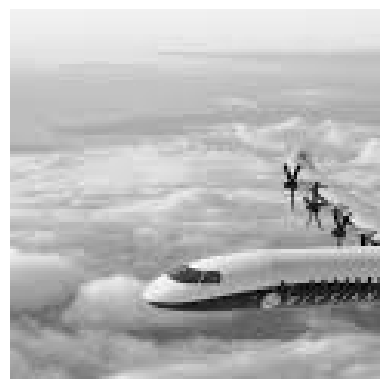

In [10]:
# 8.4 Cropping images 
image = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)
image_cropped = image[:120, :120] 
plt.imshow(image_cropped, cmap="gray")
plt.axis("off")
plt.show()


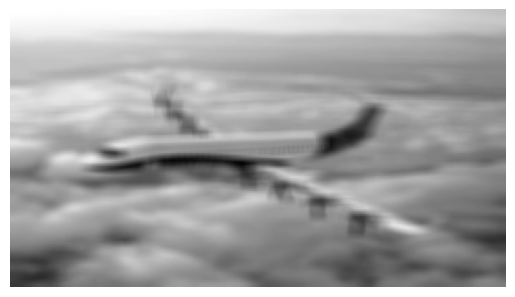

In [11]:
# 8.5 Blurring Images 
image = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)
image_blurry = cv2.blur(image, (10, 5))
plt.imshow(image_blurry, cmap="gray")
plt.axis("off")
plt.show()




In [12]:
# Kernels are used in image from sharpening to edge detection and more. 

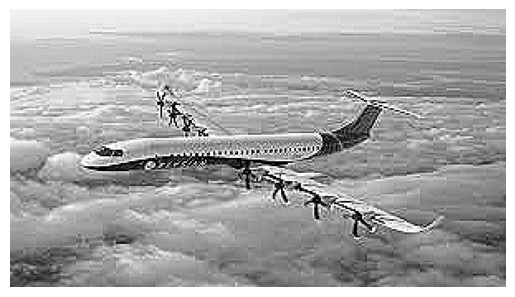

In [13]:
# 8.6 Shaperning Images 
image = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap="gray")
plt.axis("off")
plt.show()


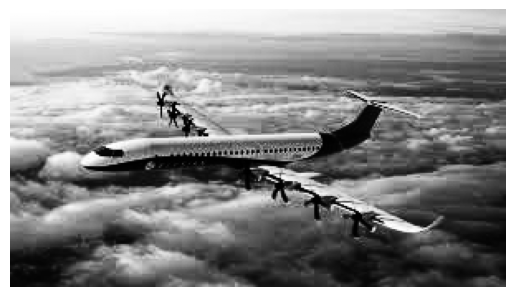

In [14]:
# 8.7 Enhancing contrast 
image = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)
image_enhanced = cv2.equalizeHist(image)
plt.imshow(image_enhanced, cmap="gray")
plt.axis("off")
plt.show()




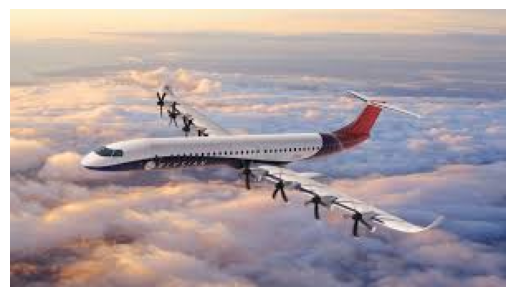

In [15]:
image_bgr = cv2.imread("assets/plane.jpeg")
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()



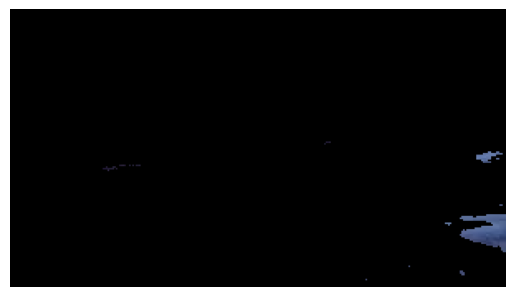

In [16]:
# 8.8 Isolating Colors 
image_bgr = cv2.imread("assets/plane.jpeg")
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask = mask)

image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()




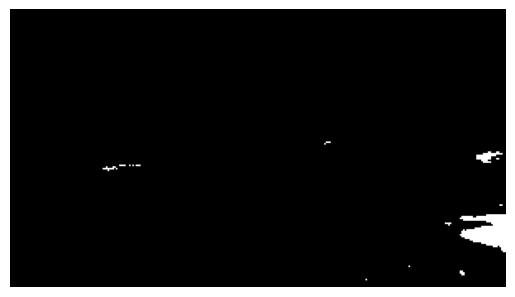

In [17]:
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()





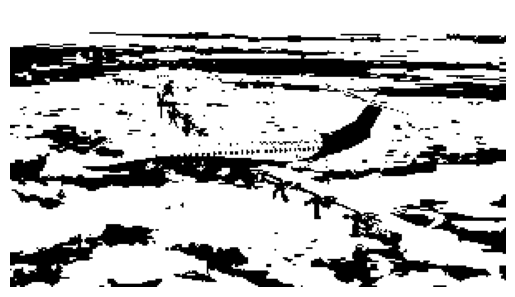

In [ ]:
# 8.9 Binarizing images
# Thresholding is the process of setting pixels with intensity greater than some value to 
# be white and less then the value to be black
# adaptive threshold is where the threshold value for a pixel is determined by the pixel 
# intensities of its neightbours 

image_grey = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)

max_output_vlaue = 255 # determines the max intensity of the pixel
neightbourhood_size = 99  # size of the neightbourhood
subtract_from_mean = 10 
image_binarized = cv2.adaptiveThreshold(image_grey, 
                                        max_output_vlaue, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # set a pixel's threshold to be a weighted sum of the neighbouring pixel intensities
                                        cv2.THRESH_BINARY, 
                                        neightbourhood_size, 
                                        subtract_from_mean)

plt.imshow(image_binarized, cmap="gray")
plt.axis("off")
plt.show()

# thresholding is for denoising an image (keep only the most important elements)



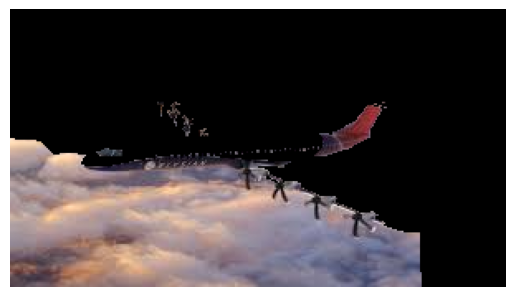

In [23]:
# 8.10 Removing backgrounds
image_bgr = cv2.imread("assets/plane.jpeg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# start x, start y, width, height
rectangle = (0, 56, 256, 150)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb, 
            mask, 
            rectangle, 
            bgdModel, 
            fgdModel, 
            10, 
            cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask ==2) | (mask == 0), 0, 1).astype('uint8')

image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.axis("off")
plt.show()




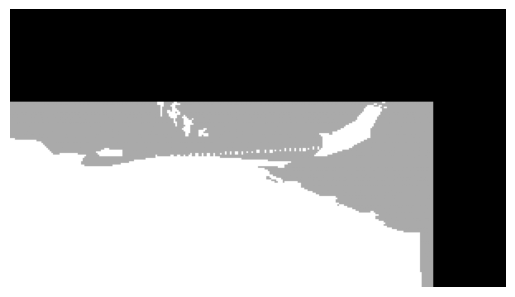

In [24]:
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

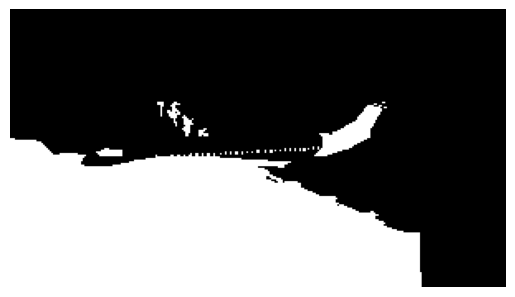

In [25]:
plt.imshow(mask_2, cmap="gray")
plt.axis("off")
plt.show()





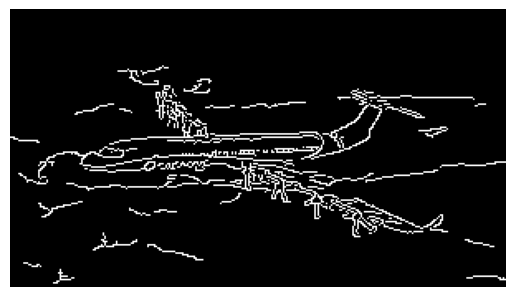

In [26]:
# 8.11 Detecting Edges 
image_gray = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)
median_intensity = np.median(image_gray)
lower_threshold = (int(max(0, (1.0 - 0.33) * median_intensity)))
upper_threshold = (int(min(255, (1.0 + 0.33) * median_intensity)))

image_edges = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_edges, cmap="gray")
plt.axis("off")
plt.show()

# Edge detection allows us to remove low information areas and isolate the areas of 
# an image that are most important 


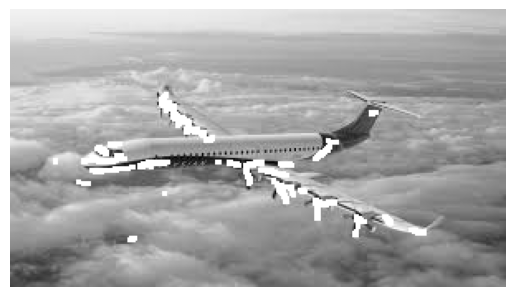

In [ ]:
# 8.12 Detecting Corners 

image_bgr = cv2.imread("assets/plane.jpeg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray) 

block_size = 2 
aperture = 29 
free_parameter = 0.04 

# Detect corners
detector_responses = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter)

# large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white 
threshold = 0.02 
image_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]

image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()

# aperture is the size of the Sobel kernel used 


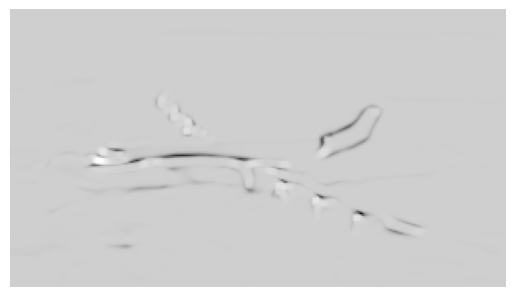

In [30]:
plt.imshow(detector_responses, cmap="gray")
plt.axis("off")
plt.show()

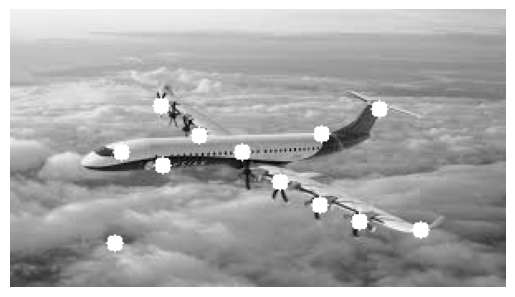

In [36]:
# Using Shi-Tomasi corner detector (goodFfeaturesToTrack)
image_bgr = cv2.imread("assets/plane.jpeg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

corners_to_detect = 15 
minimum_quality_score = 0.05 
minimum_distance = 25 

corners = cv2.goodFeaturesToTrack(image_gray, 
                                  corners_to_detect, 
                                  minimum_quality_score, 
                                  minimum_distance)

corners = np.int32(corners)

# draw white circles at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x, y), 5, (255, 255, 255), -1)

image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()



In [37]:
# 8.13 Creating Features for Machine Learning 

image = cv2.imread("assets/plane.jpeg", cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image, (10, 10))

image_10x10.flatten()

array([234, 233, 234, 233, 225, 222, 220, 213, 200, 198, 197, 195, 192,
       187, 182, 176, 172, 167, 163, 157, 185, 193, 207, 218, 176, 173,
       169, 149, 143, 139, 209, 218, 209, 182, 189, 204, 206, 150, 175,
       181, 180, 169, 159, 149, 182, 195, 114, 159, 177, 150, 151, 240,
        37,  70,  30,  43, 147, 142, 131, 110, 166, 174, 164, 186, 159,
        63, 198, 170, 149, 135, 172, 168, 182, 188, 164, 153, 152, 186,
       133, 108, 136, 139, 149, 154, 144, 134, 140, 122, 135, 112,  83,
       139, 170, 146, 129, 133, 116, 124, 135,  92], dtype=uint8)

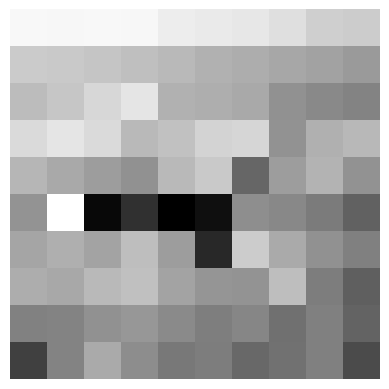

In [38]:
plt.imshow(image_10x10, cmap="gray")
plt.axis("off")
plt.show()





In [39]:
# 8.14 Encoding mean color as a feature 
image_bgr = cv2.imread("assets/plane.jpeg", cv2.IMREAD_COLOR)

channels = cv2.mean(image_bgr)

observation = np.array([(channels[2], channels[1], channels[0])])

observation

array([[168.91960317, 155.50815476, 159.14488095]])

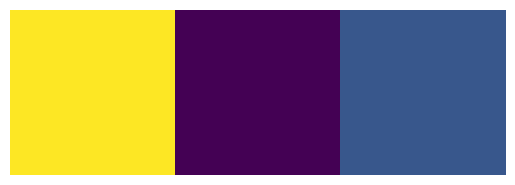

In [40]:
plt.imshow(observation)
plt.axis("off")
plt.show()





In [58]:
# 8.15 Encoding color histograms as features 
image_bgr = cv2.imread("assets/plane.jpeg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
features = [] 
colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                             [i],  # Index of channel
                             None, # No mask 
                             [256], # histogram size
                             [0, 256]) # range of pixel intensities
    features.extend(histogram)

observation = np.array(features).flatten() 
observation[:5]

array([2., 4., 1., 5., 3.], dtype=float32)

In [59]:
image_rgb[0, 0]

array([252, 244, 208], dtype=uint8)

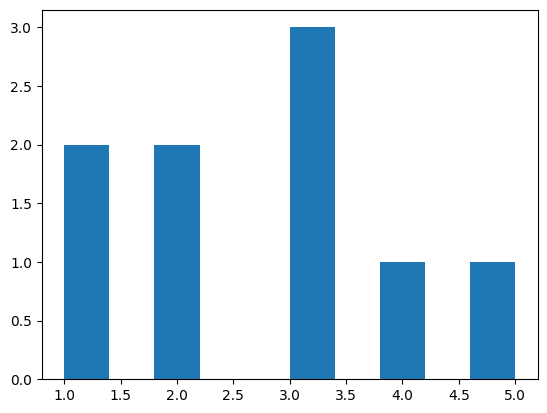

In [60]:
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])

data.hist(grid = False)
plt.show()

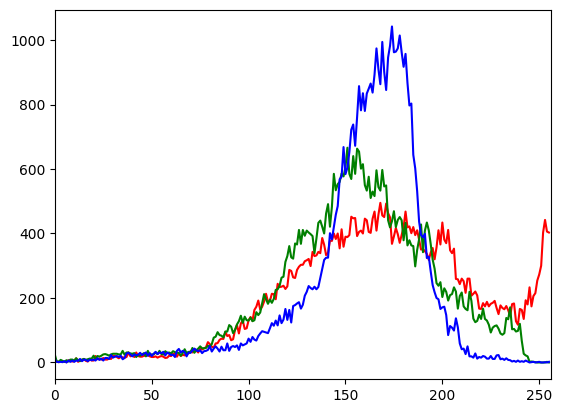

In [61]:
colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], 
                             [i], 
                             None, 
                             [256], 
                             [0, 256])
    plt.plot(histogram, color= channel)
    plt.xlim([0, 256])

plt.show()